### Chop up existing dataset images

In [37]:
import cv2 as cv
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
from scipy import stats as st

##### Explore Color Spaces for Ripe Berries

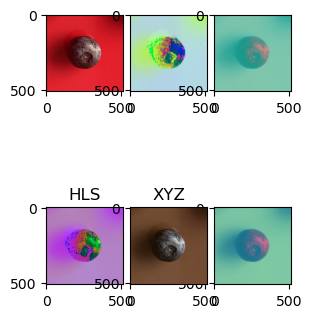

In [61]:
ripe_path = 'R_06.03.jpg'
img = cv.imread('../img/test_set/ripe/'+ripe_path)

# convert from BGR to other color spaces
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img_luv = cv.cvtColor(img, cv.COLOR_BGR2LUV)
img_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
img_xyz = cv.cvtColor(img, cv.COLOR_BGR2XYZ)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=4, ncols=12)
fig.add_subplot(gridspec[0:2, 0:2])
plt.imshow(img_rgb)
fig.add_subplot(gridspec[0:2, 2:4])
plt.imshow(img_hsv)
fig.add_subplot(gridspec[0:2, 4:6])
plt.imshow(img_lab)
fig.add_subplot(gridspec[2:4, 4:6])
plt.imshow(img_luv)
fig.add_subplot(gridspec[2:4, 0:2])
plt.title("HLS")
plt.imshow(img_hls)
fig.add_subplot(gridspec[2:4, 2:4])
plt.title("XYZ")
plt.imshow(img_xyz)

##### Explore Color Spaces for Overripe Berries

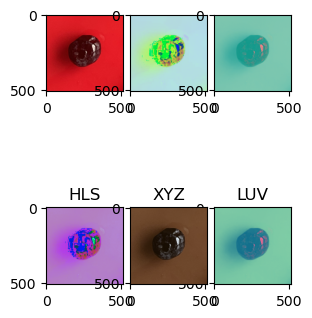

In [74]:
overripe_path = 'OR_01.01.jpg'
imgOR = cv.imread('../img/test_set/overripe/'+overripe_path)

# convert from BGR to other color spaces
imgOR_rgb = cv.cvtColor(imgOR, cv.COLOR_BGR2RGB)
imgOR_hsv = cv.cvtColor(imgOR, cv.COLOR_BGR2HSV)
imgOR_lab = cv.cvtColor(imgOR, cv.COLOR_BGR2LAB)
imgOR_luv = cv.cvtColor(imgOR, cv.COLOR_BGR2LUV)
imgOR_hls = cv.cvtColor(imgOR, cv.COLOR_BGR2HLS)
imgOR_xyz = cv.cvtColor(imgOR, cv.COLOR_BGR2XYZ)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=4, ncols=12)
fig.add_subplot(gridspec[0:2, 0:2])
plt.imshow(imgOR_rgb)
fig.add_subplot(gridspec[0:2, 2:4])
plt.imshow(imgOR_hsv)
fig.add_subplot(gridspec[0:2, 4:6])
plt.imshow(imgOR_lab)
fig.add_subplot(gridspec[2:4, 4:6])
plt.title("LUV")
plt.imshow(imgOR_luv)
fig.add_subplot(gridspec[2:4, 0:2])
plt.title("HLS")
plt.imshow(imgOR_hls)
fig.add_subplot(gridspec[2:4, 2:4])
plt.title("XYZ")
plt.imshow(imgOR_xyz)

##### Split images into color channels

In [84]:
norm = colors.Normalize(vmin=-1.,vmax=1.)
pixel_colors = img_luv.reshape((np.shape(img_luv)[0]*np.shape(img_luv)[1], 3))
OR_pixel_colors = imgOR_luv.reshape((np.shape(imgOR_luv)[0]*np.shape(imgOR_luv)[1], 3))
norm.autoscale(pixel_colors)
norm.autoscale(OR_pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
OR_pixel_colors = norm(OR_pixel_colors).tolist()

x, y, z = cv.split(img_luv)
rl_mode = st.mode(x.flatten(), keepdims=0)
ru_mode = st.mode(y.flatten(), keepdims=0)
rv_mode = st.mode(z.flatten(), keepdims=0)

or_l, or_u, or_v = cv.split(imgOR_luv)
orl_mode = st.mode(or_l.flatten(), keepdims=0)
oru_mode = st.mode(or_u.flatten(), keepdims=0)
orv_mode = st.mode(or_v.flatten(), keepdims=0)

##### Visualize color distribution for berry images

Text(0.5, 0.92, 'Overripe')

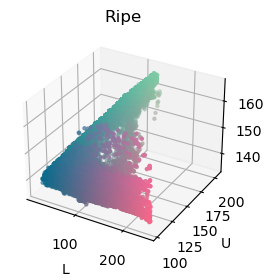

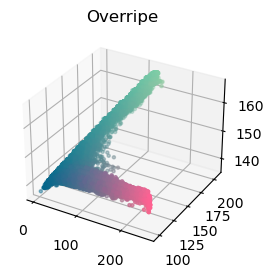

In [85]:
fig_3d = plt.figure()
xyz_axis = fig_3d.add_subplot(1, 2, 1, projection="3d")
xyz_axis.scatter(x.flatten(), y.flatten(), z.flatten(), facecolors=pixel_colors, marker=".")
xyz_axis.set_xlabel("L")
xyz_axis.set_ylabel("U")
xyz_axis.set_zlabel("V")
plt.title('Ripe')

plt.figure().add_subplot(1, 2, 1, projection="3d").scatter(or_l.flatten(), or_u.flatten(), or_v.flatten(), facecolors=OR_pixel_colors, marker=".")
plt.title('Overripe')
# plt.scatter(x.flatten(), y.flatten(), facecolors=pixel_colors, marker="x")
# plt.xlabel("V")
# plt.ylabel("U")
# plt.figure()

# plt.scatter(y.flatten(), z.flatten(), facecolors=pixel_colors, marker="x")
# plt.xlabel("U")
# plt.ylabel("L")
# plt.figure()
# plt.imshow(img_luv)

##### Define and apply mask

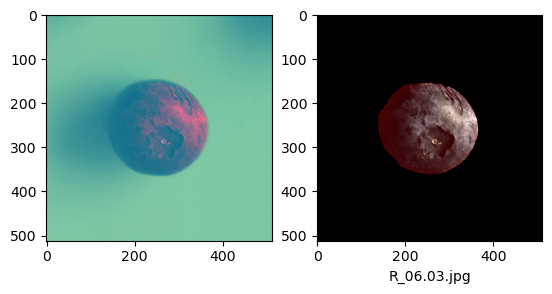

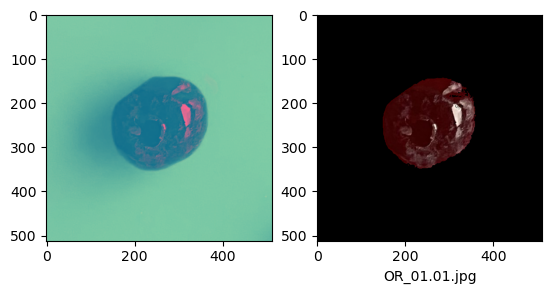

In [76]:
luv_lo = (10, 70, 100)
luv_hi = (250, 125, 160)

mask_luv = cv.inRange(img_luv, luv_lo, luv_hi)
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask_luv)
maskOR_luv = cv.inRange(imgOR_luv, luv_lo, luv_hi)
result_OR = cv.bitwise_and(imgOR_rgb, imgOR_rgb, mask=maskOR_luv)
# result_luv = cv.bitwise_and(img_luv, img_luv, mask=mask_luv)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_luv)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.xlabel(ripe_path)
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imgOR_luv)
plt.subplot(1, 2, 2)
plt.imshow(result_OR)
plt.xlabel(overripe_path)
plt.show()

##### Determine the color channel with the largest difference between ripeness categories

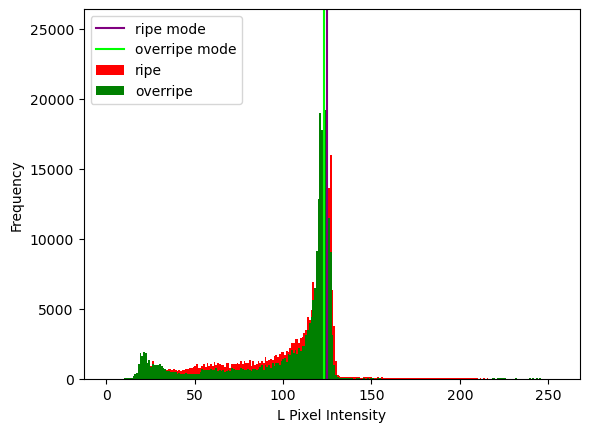

/tmp/ipykernel_5596/1644582675.py:11: RuntimeWarning: overflow encountered in scalar subtract
  orr_ldiff = np.abs(orl_mode.mode - rl_mode.mode)


254


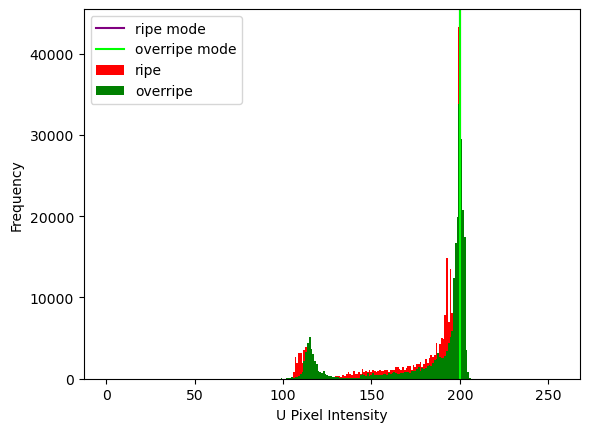

0


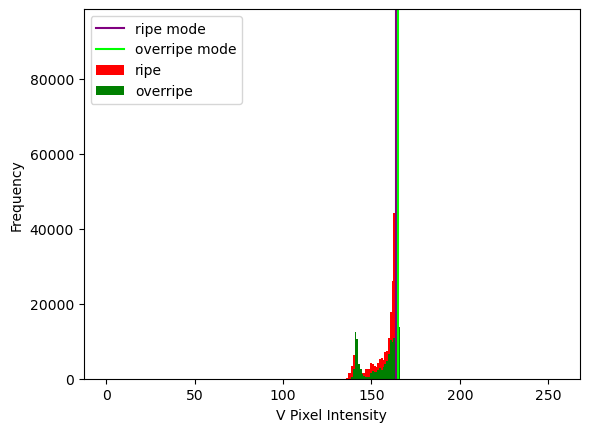

1


In [ ]:
histSize = 256
histRange = (0, 255)
plt.figure()
plt.hist(x.flatten(), bins=histSize, range=histRange, alpha=1, color='r')
plt.hist(or_l.flatten(), bins=histSize, range=histRange, alpha=1, color='g')
plt.axvline(x = rl_mode.mode, color = 'purple')
plt.axvline(x = orl_mode.mode, color = 'lime')
plt.legend(('ripe mode', 'overripe mode','ripe','overripe'), loc = 'upper left')
plt.xlabel('L Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
orr_ldiff = np.abs(orl_mode.mode - rl_mode.mode)
print(orr_ldiff)

plt.figure()
plt.hist(y.flatten(), bins=histSize, range=histRange, alpha=1, color='r')
plt.hist(or_u.flatten(), bins=histSize, range=histRange, alpha=1, color='g')
plt.axvline(x = ru_mode.mode, color = 'purple')
plt.axvline(x = oru_mode.mode, color = 'lime')
plt.legend(('ripe mode', 'overripe mode','ripe','overripe'), loc = 'upper left')
plt.xlabel('U Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
orr_udiff = np.abs(ru_mode.mode - oru_mode.mode)
print(orr_udiff)

plt.figure()
plt.hist(z.flatten(), bins=histSize, range=histRange, alpha=1,  color='r')
plt.hist(or_v.flatten(), bins=histSize, range=histRange, alpha=1, color='g')
plt.axvline(x = rv_mode.mode, color = 'purple')
plt.axvline(x = orv_mode.mode, color = 'lime')
plt.legend(('ripe mode', 'overripe mode','ripe','overripe'), loc = 'upper left')
plt.xlabel('V Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
orr_vdiff = np.abs(orv_mode.mode - rv_mode.mode)
print(orr_vdiff)

##### Test mask with other ripe images

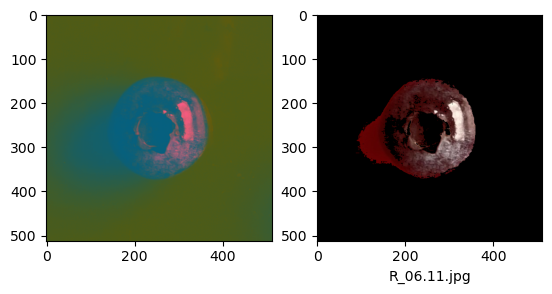

In [57]:
test_image_path = 'R_06.11.jpg'
img_test = cv.imread('../img/test_set/ripe/'+ test_image_path)
img_test = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)
img_test_luv = cv.cvtColor(img_test, cv.COLOR_BGR2LUV)

luv_lo = (10, 70, 100)
luv_hi = (250, 125, 160)

mask_test = cv.inRange(img_test_luv, luv_lo, luv_hi)
result_test = cv.bitwise_and(img_test, img_test, mask=mask_test)
# result_luv = cv.bitwise_and(img_luv, img_luv, mask=mask_luv)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_test_luv)
plt.subplot(1, 2, 2)
plt.imshow(result_test)
plt.xlabel(test_image_path)
plt.show()